# FIFA 2022 World cup Analysis

--- 

# EDA

Let's import and explore the data set.

In [1]:
# Importing libraries

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [2]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)

In [3]:
# Setting plot parameters

mpl.rcParams["figure.figsize"] = (15, 8)
mpl.rcParams["font.size"] = 12

In [4]:
# Loading the data set

goals_historic = pd.read_csv("./data/historic_world_cup_goals.csv")

In [5]:
# Displaying de first 5 rows

goals_historic.head()

,year,world_cup_day,number_of_goals,number_of_matches,cumulative_number_of_goals,cumulative_number_of_matches,average_scored_goals
0,1930,1,8,2,8,2,4.00
1,1930,2,7,2,15,4,3.75
2,1930,3,1,1,16,5,3.20
3,1930,4,3,1,19,6,3.17
4,1930,5,8,3,27,9,3.00


In [6]:
# Checking the data frame's shape

goals_historic.shape

(535, 7)

In [7]:
# Checking the missing values

goals_historic.isnull().sum()

year                            0
world_cup_day                   0
number_of_goals                 0
number_of_matches               0
cumulative_number_of_goals      0
cumulative_number_of_matches    0
average_scored_goals            0
dtype: int64

In [8]:
# Displaying data types

goals_historic.dtypes

year                              int64
world_cup_day                     int64
number_of_goals                   int64
number_of_matches                 int64
cumulative_number_of_goals        int64
cumulative_number_of_matches      int64
average_scored_goals            float64
dtype: object

In [9]:
# Displaying the main statistics

goals_historic.describe()

,year,world_cup_day,number_of_goals,number_of_matches,cumulative_number_of_goals,cumulative_number_of_matches,average_scored_goals
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,1982.478505,13.917757,4.740187,1.678505,80.880374,30.011215,2.810897
std,24.756095,8.378497,5.445145,1.564292,45.887183,18.483008,0.812199
min,1930.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1966.000000,7.000000,0.000000,0.000000,43.500000,15.000000,2.410000
50%,1986.000000,13.000000,4.000000,2.000000,77.000000,28.000000,2.640000
75%,2002.000000,20.000000,8.000000,3.000000,118.000000,48.000000,2.970000
max,2018.000000,33.000000,43.000000,8.000000,171.000000,64.000000,5.500000


In [10]:
# Checking all the World Cup years

goals_historic["year"].unique()

array([1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978,
       1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018],
      dtype=int64)

There are no missing values, and all the columns have the correct data types. The describe() method tells us:
- the most extended World Cup lasted 33 days;
- the highest number of scored goals and matches in a single day is 44 and 8, respectively;
- the highest number of goals scored in a single World Cup edition is 171 (1998 and 2014).

--- 

# Average scored goals by World Cup edition

The FIFA World Cup (FWC) had different formats over time, and the current one was introduced in 1998, with 32 national teams and 64 games. Besides these changes, it is possible to compare all the FWC edition using the evolution of the average of scored goals. 

In [11]:
# Grouping the number of goals and matches by year

mean_goals = pd.DataFrame(goals_historic.groupby(["year"])["number_of_goals", "number_of_matches"].sum())
mean_goals["average_scored_goals"] = round(mean_goals["number_of_goals"]/mean_goals["number_of_matches"], 2)
mean_goals = mean_goals.reset_index()
mean_goals

C:\Users\steph\AppData\Local\Temp\ipykernel_6232\1633740304.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_goals = pd.DataFrame(goals_historic.groupby(["year"])["number_of_goals", "number_of_matches"].sum())


,year,number_of_goals,number_of_matches,average_scored_goals
0,1930,70,18,3.89
1,1934,70,17,4.12
2,1938,72,16,4.50
3,1950,88,22,4.00
4,1954,140,26,5.38
5,1958,126,35,3.60
6,1962,89,32,2.78
7,1966,89,32,2.78
8,1970,95,32,2.97
9,1974,97,38,2.55


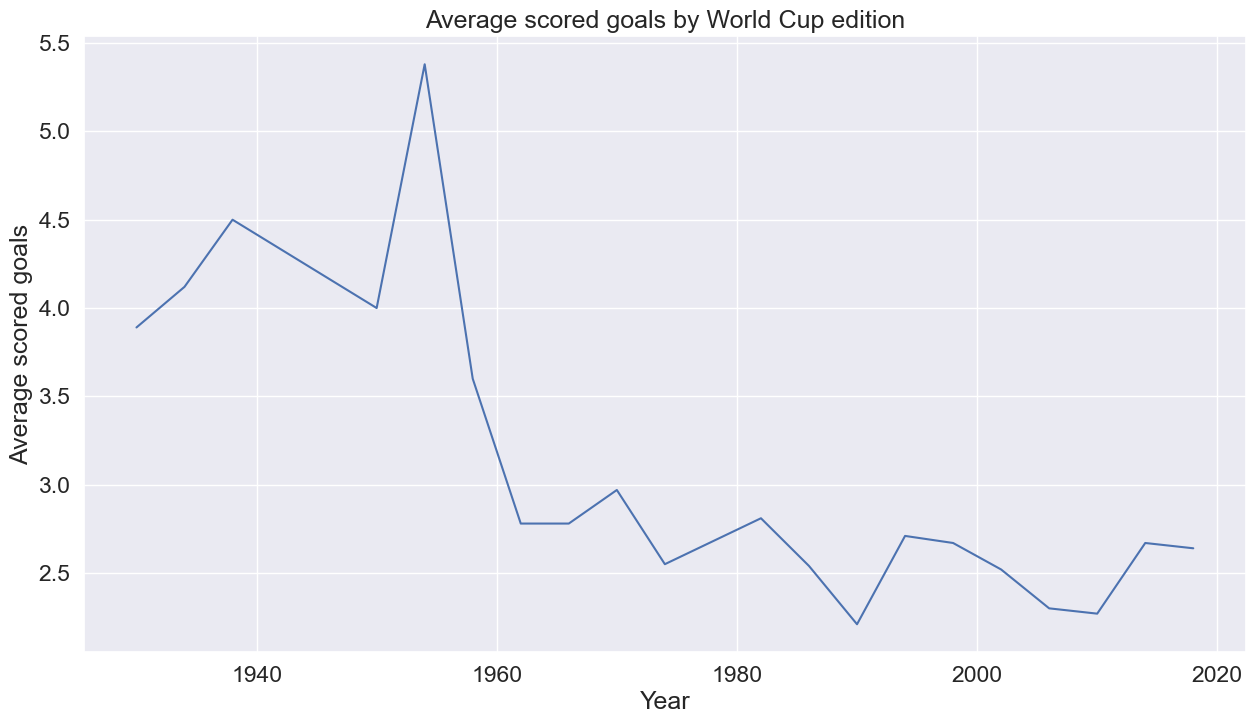

In [12]:
# Plotting the average number of goals by world cup

sns.lineplot(x="year", y="average_scored_goals", data=mean_goals)
plt.title("Average scored goals by World Cup edition")
plt.xlabel("Year")
plt.ylabel("Average scored goals")
plt.show()

There is a considerable average scored goals difference after the 1958 Sweden FIFA World Cup, which dropped from an average of 3.5 to below 3 for the entire competition until now. This difference could be explained by:
- the evolution of soccer itself;
- continuous exchange between offensive and defensive tactics;
- better tournament strategies;
- decreasing the teams' technical levels over time.

The last factor could be the most relevant one because the FIFA World Cup was getting more prominent over time, and more national teams decided to participate and developed plans to increase their technical level. Thus, the difference between the best and the worst teams was getting smaller, and the matches with many goals scored became less frequent. 

--- 

# Average number of goals during World Cups analysis

Let's see how the average number of scored goals evolves during the FWC tournament. 

In [13]:
# Dividing the data set into smaller ones

early_world_cups = goals_historic[goals_historic["year"]<1966]
mid_world_cups = goals_historic[(goals_historic["year"]>=1966) & (goals_historic["year"]<1994)]
last_world_cups = goals_historic[goals_historic["year"]>=1994]

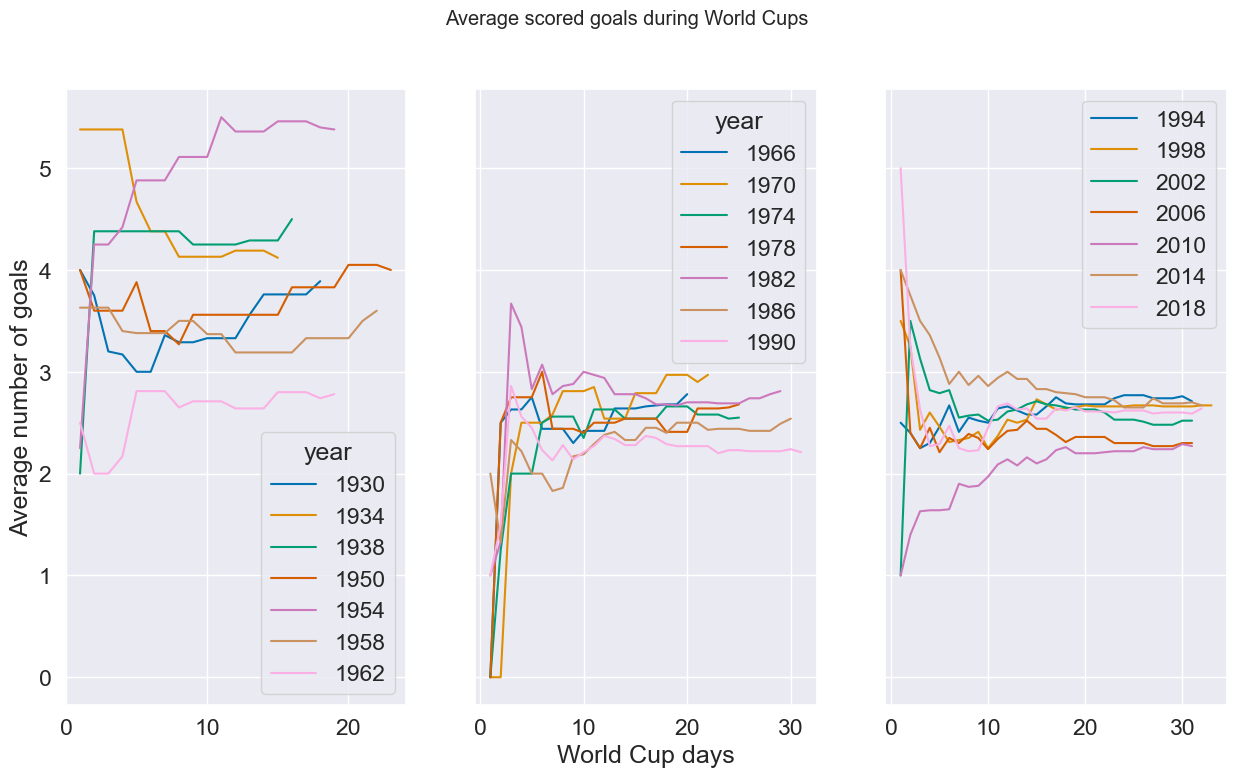

In [14]:
# Plotting the goals average during the world cup days

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)

sns.lineplot(x="world_cup_day", y="average_scored_goals", data=early_world_cups, hue="year", palette = "colorblind", ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("Average number of goals")

sns.lineplot(x="world_cup_day", y="average_scored_goals", data=mid_world_cups, hue="year", palette = "colorblind", ax=ax2)
ax2.set_xlabel("World Cup days")

sns.lineplot(x="world_cup_day", y="average_scored_goals", data=last_world_cups, hue="year", palette = "colorblind", ax=ax3)
ax3.set_xlabel("")

fig.suptitle("Average scored goals during World Cups")
plt.legend()
plt.show()

We can see the difference between the first five editions and the others in the average number of goals. 

---

# 2022 Qatar World Cup average scored goals

To compare de 2022 Qatar World Cup average scored goals with past editions, let's check how this number evolves during the competition.

In [15]:
# Loading the data set

qatar_goals = pd.read_csv("./data/qatar_world_cup_goals.csv")

In [16]:
# Displaying de first 5 rows

qatar_goals.head()

,year,world_cup_day,number_of_goals,number_of_matches,cumulative_number_of_goals,cumulative_number_of_matches,average_scored_goals
0,2022,1,2,1,2,1,2.00
1,2022,2,12,3,14,4,3.50
2,2022,3,8,4,22,8,2.75
3,2022,4,11,4,33,12,2.75
4,2022,5,8,4,41,16,2.56


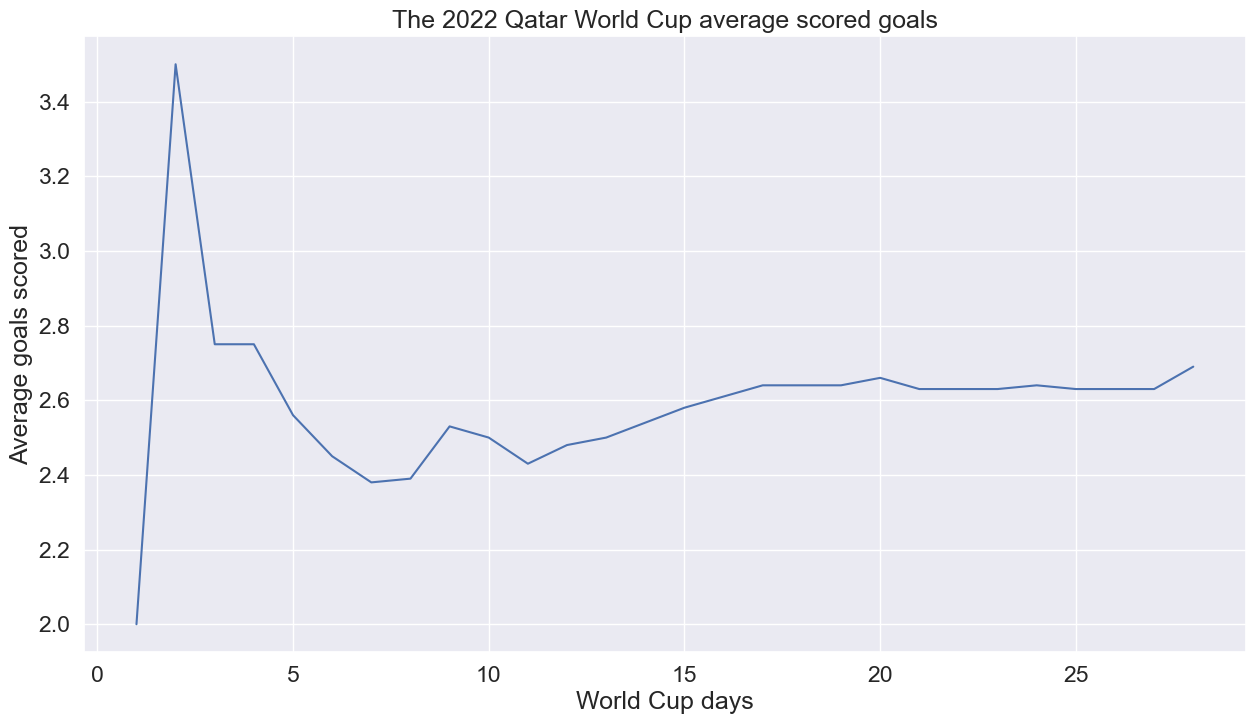

In [17]:
# Plotting the average number of goals of 2022 World Cup

sns.lineplot(x="world_cup_day", y="average_scored_goals", data=qatar_goals, palette = "colorblind")
plt.title("The 2022 Qatar World Cup average scored goals")
plt.xlabel("World Cup days")
plt.ylabel("Average goals scored")
plt.show()

In [18]:
# Selecting the last six World Cups

last_six_wc = last_world_cups[last_world_cups["year"]>1994]

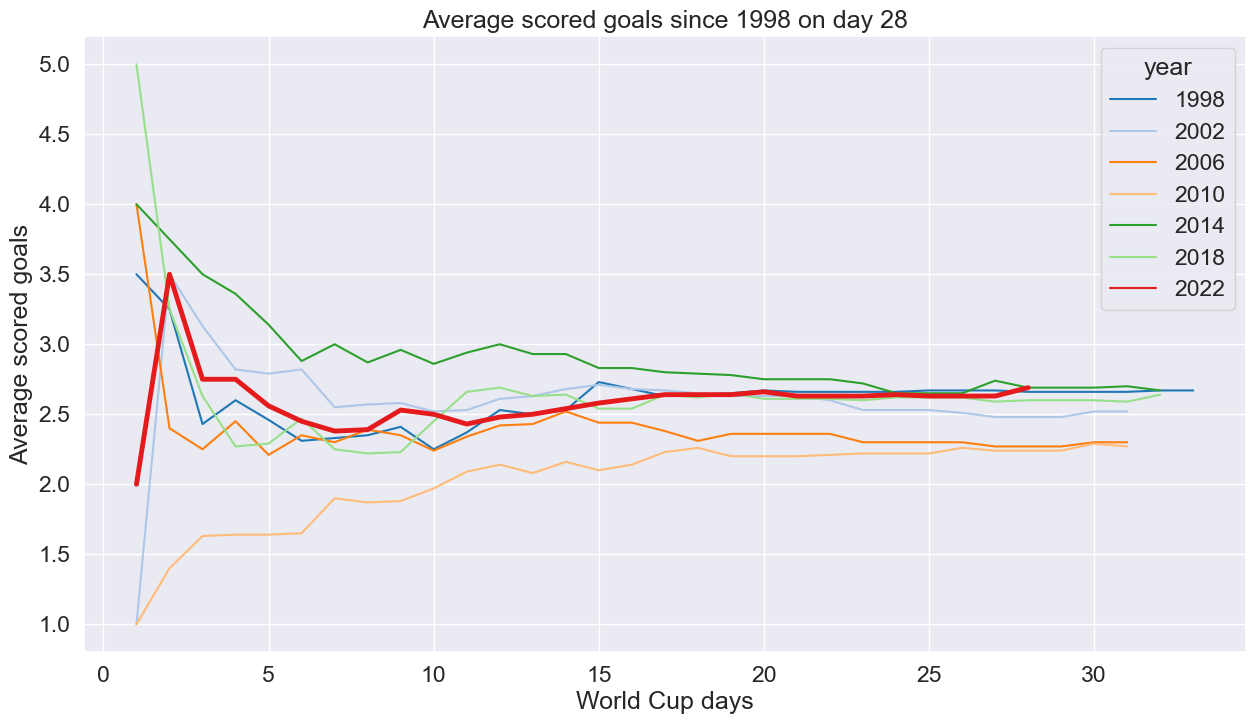

In [19]:
# Comparing the average scored goals of last six FWC

ax = sns.lineplot(x="world_cup_day", y="average_scored_goals", data=last_six_wc, hue="year", palette = "tab20")
sns.lineplot(x="world_cup_day", y="average_scored_goals", data=qatar_goals, hue="year", palette = "Set1", linewidth=3.5)
plt.xlabel("World Cup days")
plt.ylabel("Average scored goals")
plt.title("Average scored goals since 1998 on day 28") 
plt.show()

- Day 6: the 2022 WC scored an average number of goals similar to the previous tournament in Russia.
- Day 7: the average number of scored goals dropped a little, and now it is closer to 1998 and 2006.
- Day 8: the average scored goals stayed the same, although November 27th had the third-best number of goals in this tournament, only behind day 2 with 12 and day 4 with 11 goals scored, respectively.
- Day 9: 14 goals were scored, the best number so far, and the average increased to around 2.55;
- Day 10: the average is still near 2.50 and tends to stabilize until the end of the tournament. 
- Day 17: the average score of goals has been going up since day 11. This number tends to flatten or decrease due to the knockout stage.
- Day 26: the average scored goals by World Cup day is stabilized since day 21 and is similar to the best numbers since 1998.
- Day 28: the average scored goals increased due to the last two games, which had 9 goals scored combined. Therefore, this 2022 World Cup edition has the highest number since 1994, the highest in the 32-teams era.

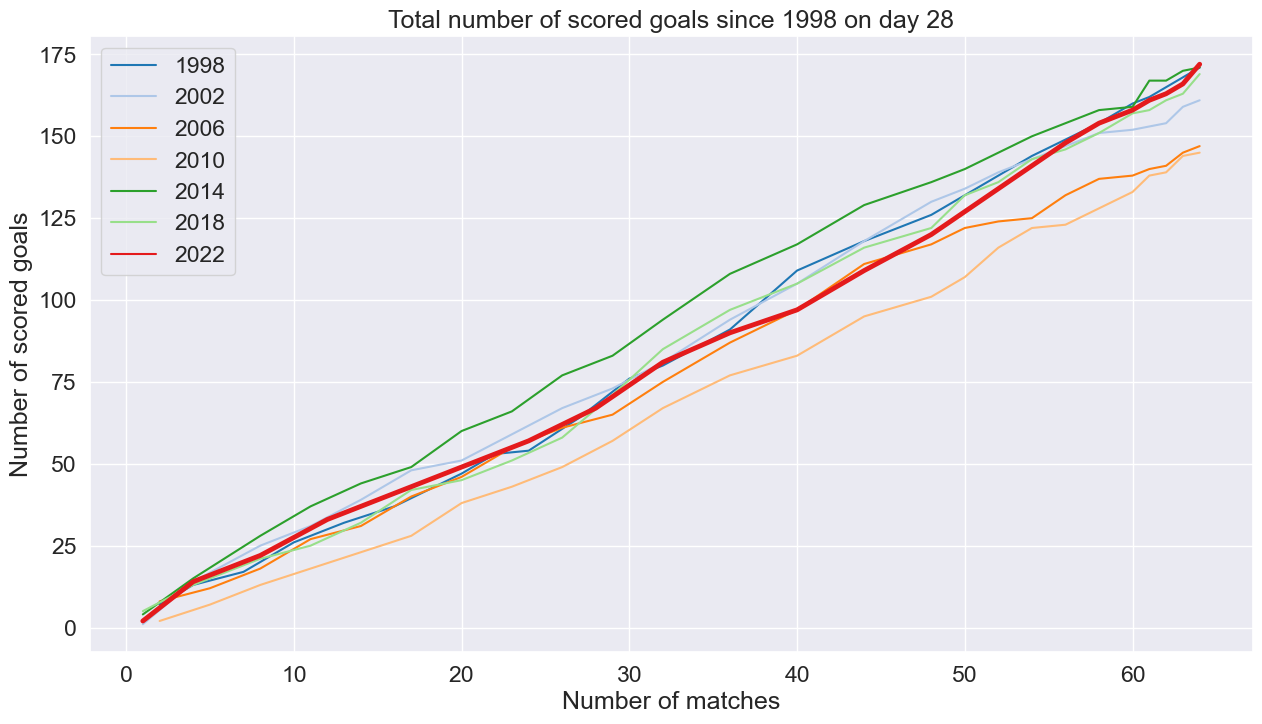

In [20]:
# Comparing the total number of scored goals of last six FWC

ax = sns.lineplot(x="cumulative_number_of_matches", y="cumulative_number_of_goals", data=last_six_wc, hue="year", palette = "tab20")
sns.lineplot(x="cumulative_number_of_matches", y="cumulative_number_of_goals", data=qatar_goals, hue="year", palette = "Set1", linewidth=3.5)
plt.xlabel("Number of matches")
plt.ylabel("Number of scored goals")
plt.title("Total number of scored goals since 1998 on day 28")
plt.legend()
plt.show()

- After 16 matches, Qatar 2022 is 7-8 goals behind the highest number of Brazil 2014;
- After 20 matches, the number of scored goals seems to be increasing linearly, and now it is closer to the number registered in France in 1998 for the second place, but still 10 goals behind Brazil in 2014.
- After 24 matches, Qatar 2022 FWC has the same goals scored as in 2006. Also, it is the fourth time in this World Cup edition (days 3, 5, 6, and 7) with the same number of goals scored, 8. 
- After 28 matches, Qatar 2022 FWC has dropped to 5th place considering the total goals scored, only above the 2006 and 2010 tournaments. 
- After 36 matches, Qatar World Cup is only above 2006, and 2010 tournaments, which could lead to a poor average scored goals.
- After 56 matches, the 2022 FWC has a similar number of goals to the 1998 tournament, and if this trend continues, it will end up with more than 160 goals scored.
- After 62 matches, the total number of scored goals stabilized and tends to be similar to the best numbers since 1998. With only 2 games left, the Qatar World Cup needs 9 goals to surpass the 171 goals scored in 1998 and 2014. It is possible but not likely.
- After all 64 matches, the FIFA World Cup Qatar 2022 surpassed the 1998 and 2014 editions and became the tournament with the most number of goals scored, 172. The last two games had 9 goals combined, especially the final game with Argentina and France with 6. The average number of goals scored is 2.69. 

--- 

# Scored goals over game time

A soccer game has two periods of 45 minutes each and possibly extra time during the knockout stages if the game ends in a tie. But we hardly ever see a goal in the first couple of minutes of the game. So, how the goals are distributed along the match? Is there a period that has more goals than the other? What about the extra time?

To answer these questions, let's look at the scored goals distribution over game time to check when it is more likely to see the ball hit the net.

In [21]:
# Importing the data

qatar_goal_times = pd.read_csv("./data/qatar_world_cup_goal_times.csv")

In [22]:
# Displaying the first five rows 

qatar_goal_times.head()

,year,stage,team_1,team_2,goals_team_1,goals_team_2,goal_number,time,half
0,2022,group stage,Qatar,Ecuador,0,2,1,16,first
1,2022,group stage,Qatar,Ecuador,0,2,2,31,first
2,2022,group stage,Senegal,Netherlands,0,2,1,84,second
3,2022,group stage,Senegal,Netherlands,0,2,2,99,second
4,2022,group stage,Qatar,Senegal,1,3,1,41,first


C:\Users\steph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


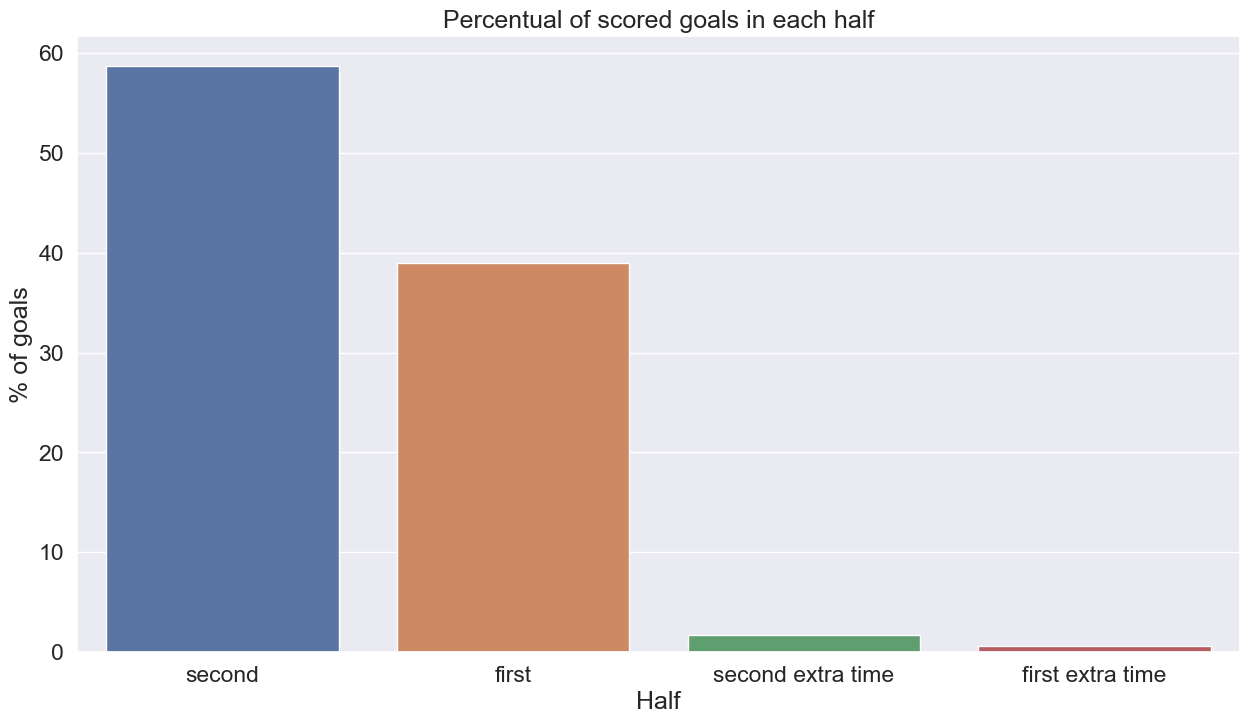

In [23]:
# Plotting the percentual of goals scored in each half

sns.barplot(qatar_goal_times["half"].value_counts().index, (qatar_goal_times["half"].value_counts(normalize=True)*100).values)
plt.xlabel("Half")
plt.ylabel("% of goals")
plt.title("Percentual of scored goals in each half")
plt.show()

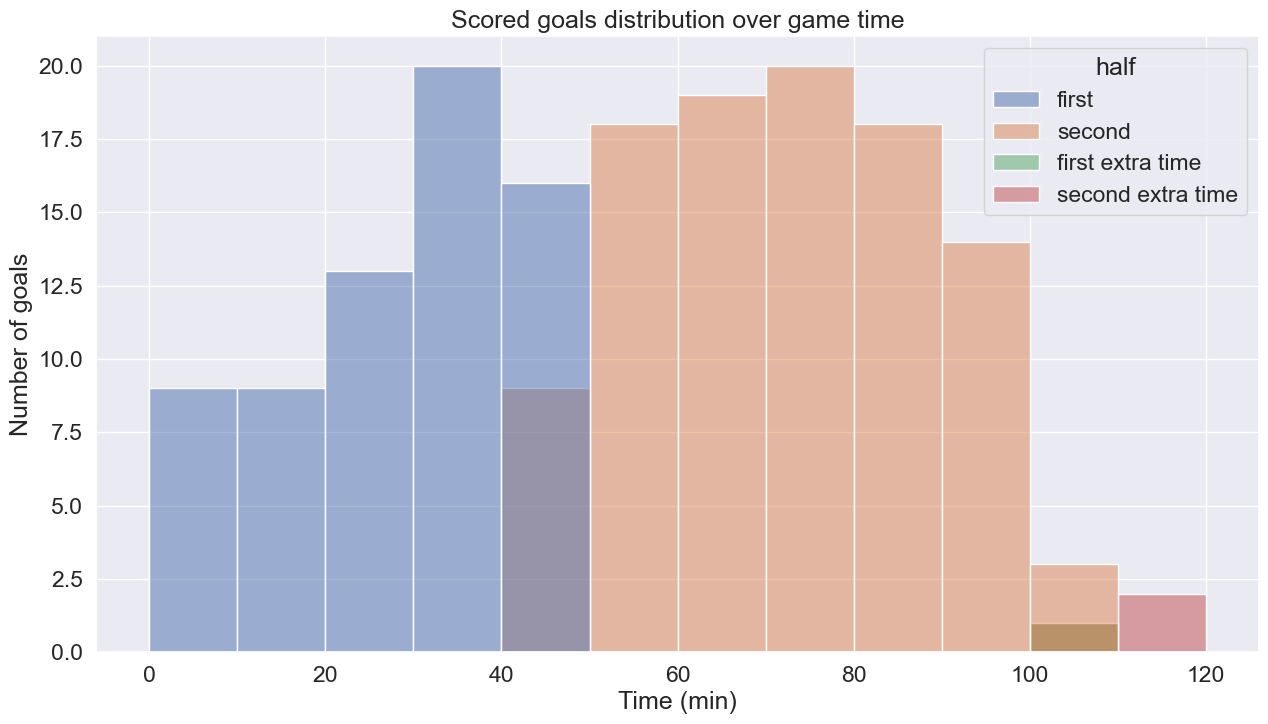

In [25]:
# Plotting the distribution of scored goals over game time

sns.histplot(x="time", data=qatar_goal_times, bins= 12, hue="half", binrange=(0,120))
plt.xlabel("Time (min)")
plt.ylabel("Number of goals")
plt.title("Scored goals distribution over game time")
plt.show()

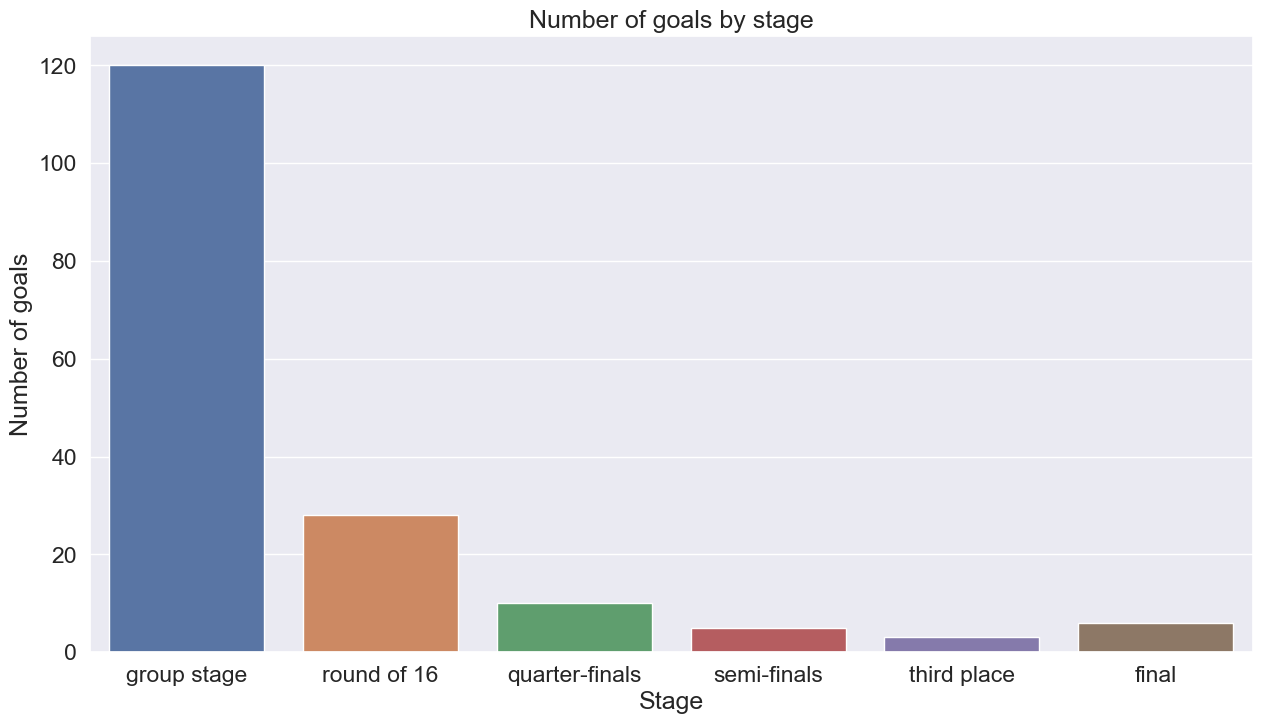

In [26]:
# Grouping the number of scored goals by stage

goals_by_stage = pd.DataFrame(qatar_goal_times.groupby(["stage"])["time"].count().reset_index())
goals_by_stage.rename(columns={"time": "number_of_goals"}, inplace=True)

# Ordering the categorical levels
cat_order = ["group stage", "round of 16", "quarter-finals", "semi-finals", "third place", "final"]

# Plotting the number of goals by stage
sns.barplot(x="stage", y="number_of_goals", data=goals_by_stage, order=cat_order)
plt.xlabel("Stage")
plt.ylabel("Number of goals")
plt.title("Number of goals by stage")
plt.show()

We can extract some insights from the graphs above:
- there were more goals scored in the second than in the first half;
- the only team that scored goals in the first extra time was Brazil in the quarter-finals against Croatia;
- the beginning of both the first and second halves had the least number of goals scored. On the other hand, between 30-40 min and 70-80 are the periods in which more goals were scored. 
- most of the goals were scored at the stage group, which has 48 of 64 matches.

The discrepancy between the number of goals scored in the first and the second half is due to the lack of concentration and fatigue after many minutes of high performance (Weineck, 2000; Reilly, 2003; Aragón-Vargas, 2004), change of tactics at the end of the match (Reilly, 2003; Drubscky, 2003).

During the extra time, only 4 goals were scored (2 on Brazil vs. Croatia and Argentina vs. France). In this game period, the players face severe fatigue and the tension and fear of conceding goals to the opponent due to the lack of time to tie the game up. 

--- 